<p style='color:black; font-size:32px; text-align:center'> <strong>CLUSTERING</strong>
</p>

# Sommaire <a class="anchor" id="Sommaire"></a>

* [Introduction](#intro)
* [Prérequis](#Imports)
* [I.Import des données](#donnees)
* [II.Phase exploratoire des données](#exp)
* [III.Division en sous-ensembles ](#div)
* [IV.Clustering](#model)
* [Conclusion générale](#Conclusion)

# Contexte du projet  <a class="anchor" id="intro"></a>

> <p>Le directeur d'une grande chaîne de magasins fait appel à vos services pour que vous aidiez l'équipe marketing à déterminer <b>la meilleure stratégie commerciale</b>.<br> Pour ce faire, vous devez réaliser une segmentation de la clientèle, c'est à dire <b>identifier les catégories de clients les plus à même de consommer</b>, et comprendre leur comportements d'achats.<br> Vous disposez d'une base de données des clients abonnés avec des informations basiques telles que : le numéro client, l'âge, le sexe, le revenu annuel et le score de dépenses (indice de consommation de 1-100.</p>

# Prérequis <a class="anchor" id="Imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
import seaborn as sns
import sidetable as stb


from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples, adjusted_rand_score

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.datasets import make_blobs

import sklearn.metrics as metrics

# Import des données <a class="anchor" id="donnees"></a>

In [2]:
df = pd.read_csv(r"bdd_clients_abonnés.csv")

> ### Premier aperçu de mon dataset

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
# Afficher les cinq premières lignes
df.head(5)
# Afficher les cinq dernières lignes
df.tail(5)
# Afficher cinq lignes aléatoires
df.sample(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
191         192  Female   32                 103                      69
93           94  Female   40                  60                      40
23           24    Male   31                  25                      73
141         142    Male   32                  75                      93
45           46  Female   24                  39                      65

In [5]:
#volumétrie du dataframe
df.shape

(200, 5)

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">200 lignes et 5 colonnes : un petit jeu de données.</p>

# Phase exploratoire des données <a class="anchor" id="exp"></a>

In [6]:
# Aperçu des informations, présence ou non d'éléments nulls, type de variables, mémoire...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Afficher le type des variables 
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

> ### Valeurs manquantes

In [8]:
# Afficher les valeurs nulles
df.isna().sum() # ou df.isna().any()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.stb.missing()

missing  total  percent
CustomerID                    0    200      0.0
Gender                        0    200      0.0
Age                           0    200      0.0
Annual Income (k$)            0    200      0.0
Spending Score (1-100)        0    200      0.0

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">dataset sans valeurs manquantes</p>

 > ### Statistiques descriptives

Le CustomerID étant un chiffre individuel et unique, nous ne le prenons pas en compte dans la suite de nos observations.

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df2 = df.copy()

In [12]:
df2 = df2[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
df2.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La médiane est assez proche de la moyenne pour l'ensemble de nos variables. La répartition de nos données est équilibrée. L'age entre 18 et 70 ans, Annual Income (revenus annuels) entre 15 et 135 k$ et Spending Score (score de dépense) entre 1 et 99. </p>

>  <i class="fa fa-bar-chart fa-2x" aria-hidden="true"></i> 
>  ### Visualisation des valeurs corrélées

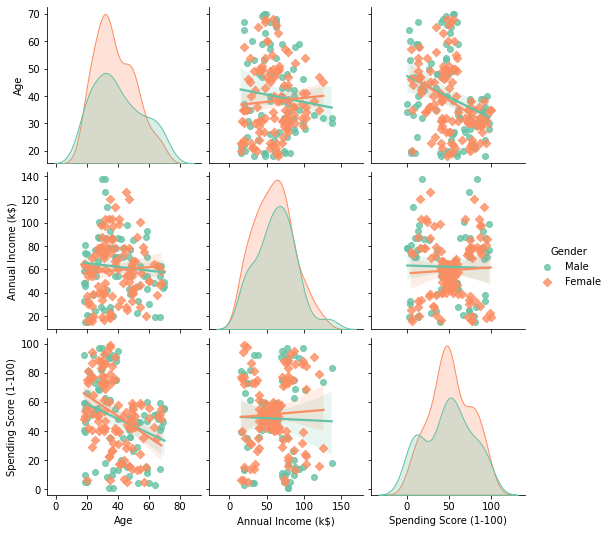

In [14]:
# Pairplot pour avoir une première idée des relations possibles entre les données et leurs distributions

#sns.pairplot(df2, kind = 'reg', diag_kind = 'kde', corner = True,);
sns.pairplot(df2, vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"],  
             kind ="reg", hue = "Gender", palette = "Set2", markers = ['o','D']);

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">C'est intéressant de jeter un œil à la diagonale de ce diagramme de paires en faisant une différenciation entre les femmes et les hommes, pour chaque valeur de chaque variable, nous pouvons maintenant voir le proportion entre hommes et femmes et, comme on peut le constater, la couleur rose se retrouve dans un rapport plus élevé que la bleue, puisqu'il y a plus de femmes que d'hommes, comme on vient de le voir.</p>

#### Age and Annual Income

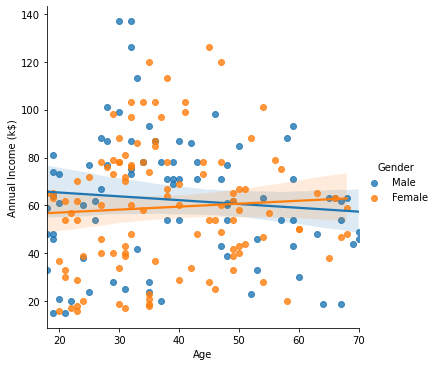

In [15]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = df2, hue = "Gender");

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Dans ce graphique, nous pouvons clairement voir comment les personnes dans la trentaine, la quarantaine et la cinquantaine ont tendance à gagner plus d'argent par an que celles de moins de trente ans ou de plus de cinquante ans. C'est-à-dire que les personnes dont l'âge se situe entre trente et cinquante ans semblent obtenir de meilleurs emplois car elles sont peut-être mieux préparées ou déjà plus expérimentées que les jeunes ou les personnes âgées. Dans le graphique, nous pouvons également voir comment les hommes ont tendance à gagner un peu plus d'argent que les femmes, au moins jusqu'à cinquante ans. </p>

#### Spending Score and Annual Income

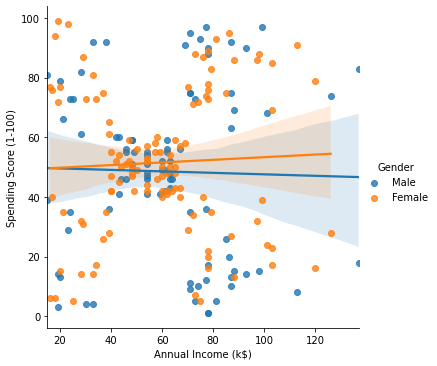

In [16]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender");

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Ici, nous pouvons observer comment un meilleur revenu annuel conduit à un score de dépenses plus élevé, en particulier pour les femmes. Cependant, la corrélation entre ces deux variables n'est pas si grande, nous semblons trouver la majorité des gens au milieu, des gens qui ont des salaires décents et ont un score de dépenses raisonnablement élevé. </p>

#### Age and Spending Score

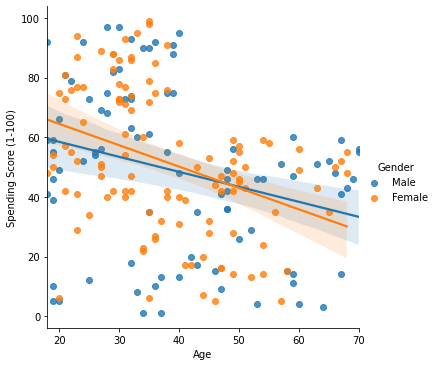

In [17]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender");

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Dans ce graphique, nous voyons quelque chose que nous pourrions prédire, les jeunes ont tendance à dépenser beaucoup plus que les personnes âgées. Cela peut être dû à de nombreuses raisons: les jeunes ont généralement plus de temps libre que les personnes âgées, les centres commerciaux ont tendance à avoir des magasins qui ciblent les jeunes tels que les jeux vidéo et les magasins technologiques.</p>

#### Heatmap pour pouvoir identifier rapidement par code couleur les valeurs les plus corrélées

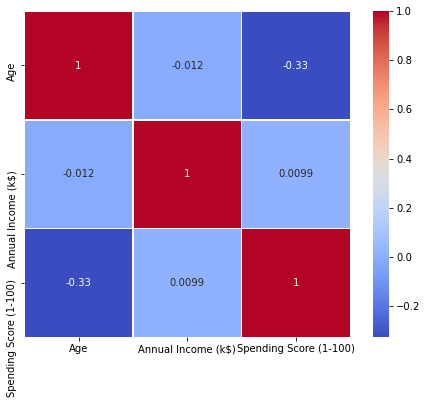

In [18]:
# Heatmap pour pouvoir identifier rapidement par code couleur les valeurs les plus corrélées
cor = df2.corr() 

plt.subplots(figsize=(8,6))
sns.heatmap(cor, square = True, cmap = "coolwarm", linewidths = .5, annot = True );

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Conclusion sur heatmap : les 3 variable ne sont pas corrélées</p>

>  ### Analyse des données

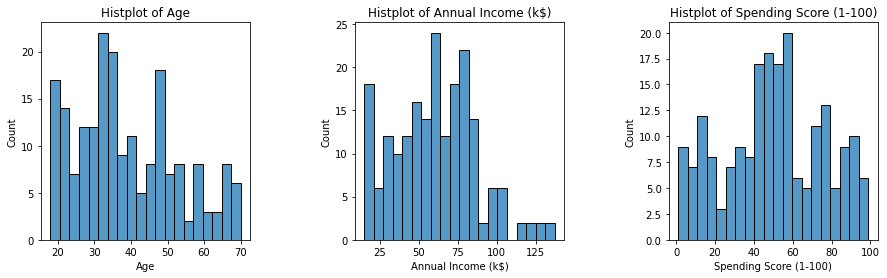

In [19]:
#Distribution plot for Age, Annual Income and Spending Score.

plt.figure(1, figsize = (15, 4))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.show();

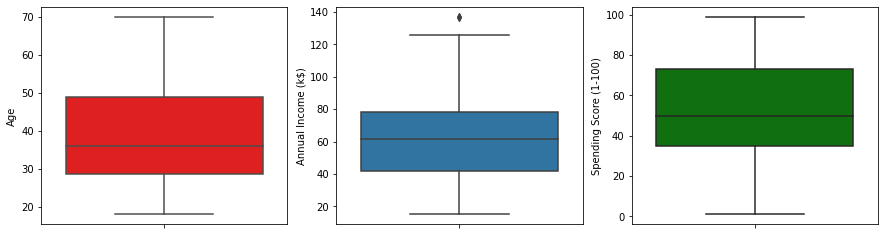

In [20]:
#boîte à moustaches d'age, du score des dépenses et du revenu annuel pour mieux visualiser la fourchette
#de distribution. La fourchette du score des dépenses est clairement supérieure 
#à la fourchette des revenus annuels. 

plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.boxplot(y=df["Age"], color="red")
plt.subplot(1,3,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.subplot(1,3,3)
sns.boxplot(y=df["Spending Score (1-100)"], color="green")
plt.show()

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La fourchette du score des dépenses est clairement supérieure à la fourchette des revenus annuels. On observe des valeurs extrêmes dans les revenus annuels. Sont-elles susceptible d'influencer le clustering ? </p>

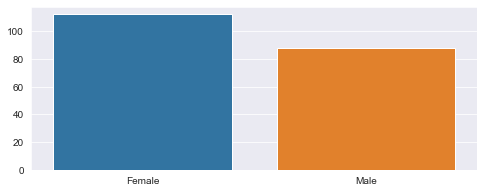

In [21]:
#diagramme à barres pour vérifier la distribution de la population masculine et féminine 
#dans l'ensemble de données. La population féminine l'emporte clairement sur l'homologue masculin. 

genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8, 3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La population féminine l'emporte clairement sur l'homologue masculin.</p>

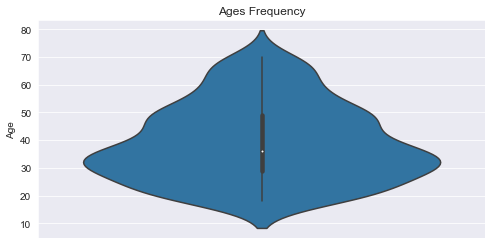

In [22]:
#la colonne id ne semble pas pertinent pour le contexte. 
#la fréquence d'âge des clients. 
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(8, 4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

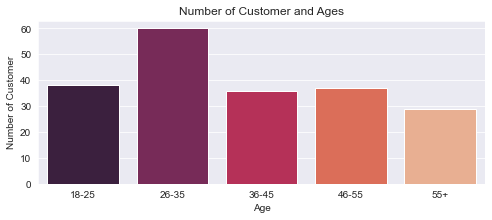

In [23]:
#diagramme à barres pour vérifier la répartition du nombre de clients dans chaque tranche d'âge. 
#le groupe d’âge des 26 à 35 ans dépasse tous les autres groupes d’âge. 

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(8, 3))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Le groupe d’âge des 26 à 35 ans dépasse tous les autres groupes d’âge.</p>

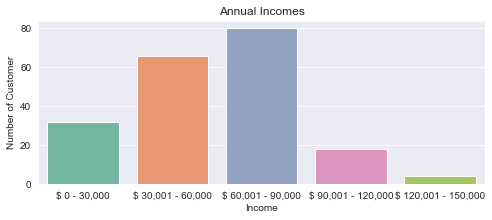

In [24]:
#un diagramme à barres pour visualiser le nombre de clients en fonction de leur revenu annuel. 
#La majorité des clients ont un revenu annuel compris entre 60000 et 90000. 

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(8, 3))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La majorité des clients ont un revenu annuel compris entre 60000 et 90000. Aussi un nombre important de clients ont un revenu annuel compris entre 30000 et 60000.</p>

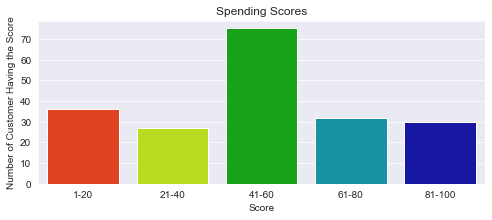

In [25]:
#une diagramme à barres pour visualiser le nombre de clients en fonction de leurs scores de dépenses. 
#La majorité des clients ont un score de dépenses compris entre 41 et 60. 

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(8, 3))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show();

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La majorité des clients ont un score de dépenses compris entre 41 et 60.</p> 

######  <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Pourquoi un clustering**
> <p style="color:#4caba9;">La raison principale pour laquelle nous adoptons cette approche de 'clustering' est que la différence entre les hommes et les femmes dans ces données n'est pas particulièrement élevée et qu'une différenciation entre les sexes ne fournira aucune information supplémentaire. La deuxième raison et non des moindres est le fait que les magasins, en général, ne ciblent presque plus un sexe spécifique, dans presque tous les magasins d'un centre commercial, des produits masculins et féminins peuvent être trouvés.

> <p style="color:#4caba9;">De plus, nous ne voulons pas interférer dans le processus d'apprentissage non supervisé, nous laisserons l'algorithme faire son travail et une fois terminé, nous analyserons les résultats et en extrairons les conclusions et les connaissances.</p>

## Transformation

In [26]:
df_trans = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_trans.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [27]:
X = df_trans.values

std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [28]:
df_trans[list(df_trans.columns)] = X_scaled

<ipython-input-28-fabc91fe7f1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans[list(df_trans.columns)] = X_scaled
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [29]:
#df_trans[list(df_trans.columns)] = X_scaled
#df_trans

# Clustering avec 3 variables

## Récupération des indicateurs de pertinence pour le nombre de clusters

In [30]:
# On tente de 2 à 10 clusters
sse, db, slc = {}, {}, {}

for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 10).fit(X_scaled)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
        
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X_scaled, clusters)
    slc[k] = silhouette_score(X_scaled, clusters)

## Evaluation des indicateurs

### SSE

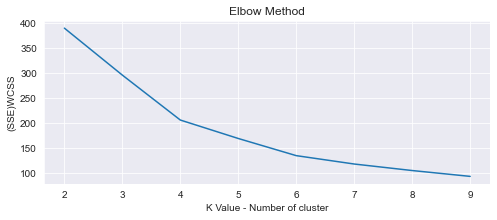

In [31]:
plt.figure(figsize=(8,3))
plt.plot(list(sse.keys()), list(sse.values()))

plt.title("Elbow Method")
plt.xlabel("K Value - Number of cluster")
plt.ylabel("(SSE)WCSS")
#plt.xticks(np.arange(1,11,1))
plt.show();

### Davies-Bouldin

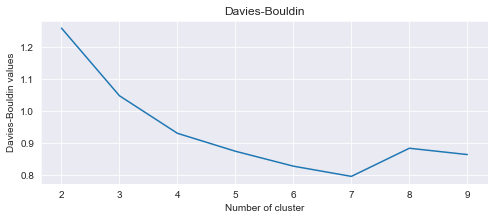

In [32]:
plt.figure(figsize=(8,3))
plt.plot(list(db.keys()), list(db.values()))

plt.title("Davies-Bouldin")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show();

### Silhouette

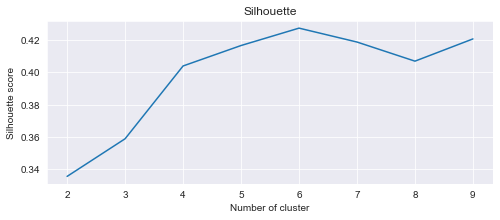

In [33]:
plt.figure(figsize=(8,3))
plt.plot(list(slc.keys()), list(slc.values()))

plt.title("Silhouette")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show();

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Les trois indicateurs ne s'accordent pas sur un nombre de cluster idéal.

><p style="color:#4caba9;">   - La méthode du coude : 4 ou 6
><p style="color:#4caba9;">   - Davies-Bouldin : 7
><p style="color:#4caba9;">   - Le score de silhouette : 6

><p style="color:#4caba9;">    Conclusion finale : 6 clusters

## Clustering avec 6 clusters

In [34]:
kmeans = KMeans(n_clusters = 6, max_iter = 1000, random_state = 10).fit(X_scaled)

In [35]:
df['cluster'] = kmeans.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    Male   19                  15                      39        4
1    Male   21                  15                      81        4
2  Female   20                  16                       6        3
3  Female   23                  16                      77        4
4  Female   31                  17                      40        3

## Représentation graphique

In [36]:
fig = go.Figure()

for C in list(df['cluster'].unique()):
    
    fig.add_trace(go.Scatter3d(x = df[df['cluster'] == C]['Age'],
                               y = df[df['cluster'] == C]['Annual Income (k$)'],
                               z = df[df['cluster'] == C]['Spending Score (1-100)'],
                               mode = 'markers', marker_size = 8, marker_line_width = 1,
                               name = 'Cluster ' + str(C)))
    
fig.update_layout(width = 1000, height = 1000, autosize = True, showlegend = True,
                  scene = dict(xaxis=dict(title = 'Age', titlefont_color = 'black'),
                               yaxis=dict(title = 'Annual Income', titlefont_color = 'black'),
                               zaxis=dict(title = 'Spending Score', titlefont_color = 'black')),
                             
                  font = dict(family = "Carrol", color  = 'black', size = 10))


## Description des clusters

In [37]:
#Centroides des données centrées
centres = kmeans.cluster_centers_
centres

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 0.22171558,  1.08322527, -1.29005223],
       [-0.87309844, -0.11378508, -0.09358039],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.97602698, -1.32549704,  1.0371827 ],
       [ 1.25472096, -0.24021294, -0.04399777]])

In [38]:
# Calcul des données par clusters
df_clusters = round(df.groupby('cluster').agg({'Age': ['mean','median', 'min', 'max'],
                                           'Annual Income (k$)': ['mean','median', 'min', 'max'],
                                           'Spending Score (1-100)': ['mean','median', 'min', 'max']}),2)
df_clusters['count'] = df.value_counts("cluster").sort_index()
df_clusters

Age                Annual Income (k$)                  \
          mean median min max               mean median min  max   
cluster                                                            
0        32.69   32.0  27  40              86.54   79.0  69  137   
1        41.94   43.0  19  59              88.94   86.0  71  137   
2        26.68   26.0  18  40              57.58   60.0  40   76   
3        45.52   46.0  20  67              26.29   25.0  16   39   
4        25.25   23.5  18  35              25.83   24.5  15   39   
5        56.33   54.0  43  70              54.27   54.0  38   79   

        Spending Score (1-100)                count  
                          mean median min max        
cluster                                              
0                        82.13   83.0  63  97    39  
1                        16.97   16.0   1  39    33  
2                        47.79   49.5  10  60    38  
3                        19.38   15.0   3  40    21  
4                        76.92   76.5  39  99    24  
5                        49.07   49.0  35  60    45

### Encoder la variable catégorielle Gender

In [39]:
# On affecte la fonction labelEncoder() à encoder
# labelEncoder() va transformer / convertir les valeurs de la cible en chiffres (allant de 0 à n-1)
encoder = preprocessing.LabelEncoder()


# On affecte cette transformation à la colonne Gender de la dataframe avec .fit_transform
encoder.fit_transform(df2['Gender'])

# On écrase l'ancienne version avec la nouvelle !
df2['Gender'] = encoder.fit_transform(df2['Gender'])


# On affiche les 5 premières lignes de la dataframe une fois les modifications apportées
df2.head(5)

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

### Heatmap pour observer les corrélations avec Gender 

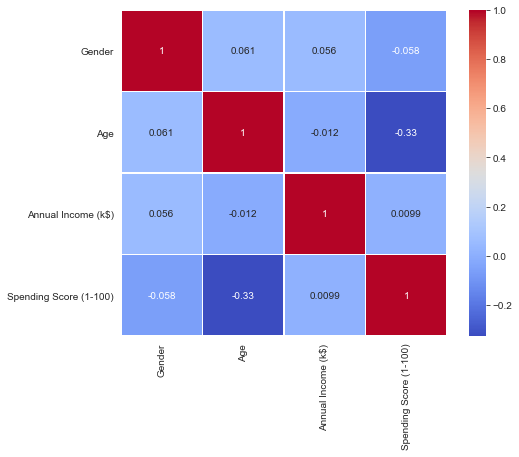

In [40]:
# Heatmap pour identifier les valeurs les plus corrélées

cor = df2.corr() 

plt.subplots(figsize=(8,6))
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True );

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La colonne Gender n'est pas corrélée aux autres colonnes. On a une confirmation que c'est pas nécessaire l'utilisation de la colonne 'Gender'.</p>

# Selecting Number of Clusters <a class="anchor" id="model"></a>

Choisir le bon nombre de clusters.

Maintenant que nous avons déjà un peu compris cet ensemble de données, il est temps de décider du nombre de clusters dans lesquels nous voulons diviser nos données. Pour ce faire, nous allons utiliser la méthode Elbow. 

> ### Paramètres 

> <p>Les hyper-paramètres du K-Means clustering :<br>
    - n_clusters = nombre K de clusters.<br>
    - n_init = nombre d'exécutions (10), d'initialisation que l'on veut avoir pour notre algorithme.<br>
    - max_iter = nombre d'itérations (300).<br>
    - Init = type d'initialisation (k-means++)</p>

### Le plot sans clustering

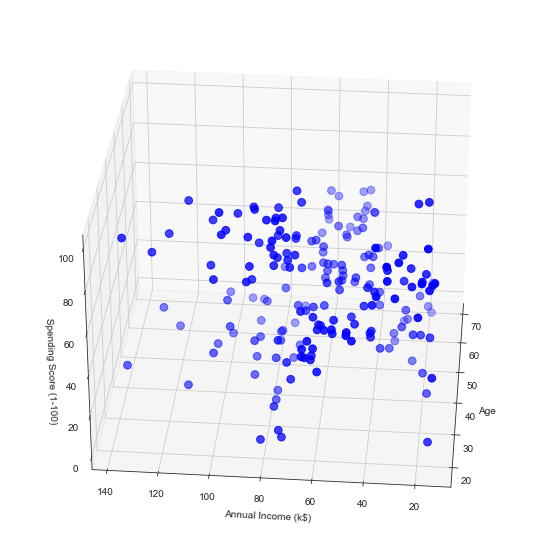

In [41]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c = 'blue', s = 60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show();

### Creating values for the elbow

In [42]:
#Creating values for the elbow
# inertia = wcss

X = df.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,20)
for i in k:
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 10, n_init = 10, init = "k-means++")
    
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [43]:
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

### Plotting the elbow

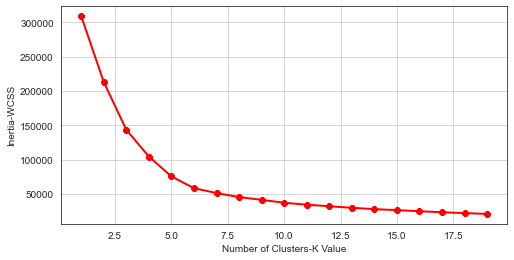

In [44]:
#Plotting the elbow

plt.figure(figsize=(8, 4))    
plt.grid()
plt.plot(k , inertia , linewidth = 2, color = "red", marker = "8")
plt.xlabel('Number of Clusters-K Value') 
plt.ylabel('Inertia-WCSS')
plt.show();

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La méthode du coude est utilisée pour déterminer le nombre optimal de clusters dans le clustering k-means. La méthode du coude trace la valeur de la fonction de coût produite par différentes valeurs de k et il faut choisir un certain nombre de clusters afin que l'ajout d'un autre cluster ne donne pas une meilleure modélisation des données. Dans ce problème, nous utilisons l'inertie comme fonction de coût afin d'identifier la somme des distances au carré des échantillons au centre de cluster le plus proche.</p>
> <p style="color:#4caba9;">En regardant cet exemple particulier, si nous imaginons que la ligne dans le graphique est un bras, le coude peut être trouvé, approximativement, là où le nombre de clusters est égal à 5. Par conséquent, nous sélectionnons 5 comme nombre de clusters pour diviser nos données.</p>

### Training kmeans with 5 clusters

In [45]:
#Training kmeans with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = 10)
clusters = kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Create a 3d plot to view the data sepparation made by Kmeans

In [46]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
                    x = X['Spending Score (1-100)'],
                    y = X['Annual Income (k$)'],
                    z = X['Age'],
                    mode ='markers',
                    marker = dict(color = labels, size = 3, line = dict(color = labels), opacity = 0.9)
)

layout = go.Layout(
                title = 'Clusters',
                scene = dict(
                        xaxis = dict(title  = 'Spending Score (1-100)'),
                        yaxis = dict(title  = 'Annual Income (k$)'),
                        zaxis = dict(title  = 'Age')),
                font = dict(family = "Gilroy", color  = 'black', size = 10)
)
fig = go.Figure(data = trace1, layout = layout)
py.offline.iplot(fig);

 > <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**  
   
> <p style="color:#4caba9;">Orange Cluster - Le groupe orange regroupe les jeunes à faible revenu annuel qui dépensent en fait beaucoup.
> <p style="color:#4caba9;">Pink Cluster - Le cluster rose regroupe raisonnablement des jeunes avec des salaires assez décents qui dépensent beaucoup.
> <p style="color:#4caba9;">Yellow Cluster - Le cluster jaune regroupe essentiellement des personnes de tous âges dont le salaire n'est pas assez élevé et leur score de dépenses est modéré.
> <p style="color:#4caba9;">Purple Cluster - Le cluster violet regroupe des personnes qui ont en fait de très bons salaires et dépensent à peine de l'argent, leur âge se situe généralement entre trente et soixante ans.
> <p style="color:#4caba9;">Blue Cluster  - Les groupes bleus dont le salaire est assez bas et ne dépensent pas beaucoup d'argent dans les magasins, ce sont des gens de tous âges. 

 > <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusions**  

> <p style="color:#4caba9;">KMeans Clustering est une technique puissante pour parvenir à une segmentation client décente.
    La segmentation des clients est un bon moyen de comprendre le comportement des différents clients et de planifier une bonne stratégie marketing en conséquence.
> <p style="color:#4caba9;">Il n'y a pas beaucoup de différence entre le score de dépenses des femmes et des hommes, ce qui nous porte à penser que notre comportement en matière de shopping est assez similaire.
> <p style="color:#4caba9;">En observant le graphique de clustering, on peut clairement observer que ceux qui dépensent le plus d'argent dans les centres commerciaux sont les jeunes. C'est-à-dire qu'ils sont la principale cible en matière de marketing, donc faire des études plus approfondies sur ce qui les intéresse peut conduire à des profits plus élevés.
    Bien que les jeunes semblent être ceux qui dépensent le plus, nous ne pouvons pas oublier qu'il y a plus de personnes que nous devons considérer, comme les personnes qui appartiennent à la "Yellow Cluster", elles sont ce que nous appellerions communément «classe moyenne» et il semble être le plus grand cluster.
> <p style="color:#4caba9;">La promotion de remises sur certains magasins peut intéresser ceux qui ne dépensent pas beaucoup et qui finissent par dépenser plus! 

#### Another 3d plot, maybe a better interpretations !!!!

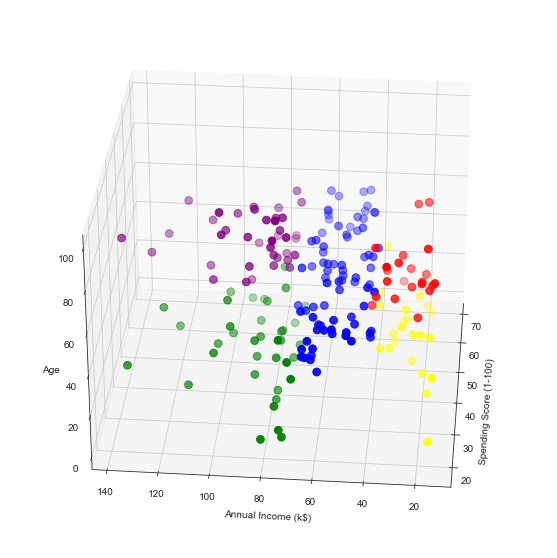

In [71]:
#Create a 3d plot to view the data sepparation made by Kmeans
kmeans = KMeans(n_clusters = 5)
#nu este un simplu fit ca mai sus!!!
clusters = kmeans.fit_predict(X)

df["label"] = clusters


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], 
           df["Spending Score (1-100)"][df.label == 0], c='red', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], 
           df["Spending Score (1-100)"][df.label == 1], c='blue', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], 
           df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], 
           df["Spending Score (1-100)"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], 
           df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Age")
plt.show();

